Here deterministic strategies: LO, LI, and RI.
For ω_n (I ... I)_m define n == m for, where n is [2, 30]

# Import the dependencies

In [11]:
import sys
from tqdm import tqdm

sys.path.append("../")
from calculus_path_mod.term_engine import *
from calculus_path_mod.reduction_strategy import *

Lambda = Abstraction
App = Application

# Defining test term:
    ω_n (I ... I)_m

In [12]:
def i_term():
    x = Var()
    x_ = Atom(x)
    return Lambda(x, x_)


def omega_term(n: int):
    x = Var()
    x_ = Atom(x)
    body_app_term = x_
    for _ in range(n - 1):
        body_app_term = App(body_app_term, x_)
    return Lambda(x, body_app_term)


def multi_i_term(m: int):
    app_term = i_term()
    for _ in range(m - 1):
        app_term = App(app_term, i_term())
    return app_term


def omega_multi_i_term(n: int, m: int):
    return App(omega_term(n), multi_i_term(m))

# Drawing stuff

In [13]:
import matplotlib.pyplot as plt


def draw_mult_lines(
    comp_data: dict, title="title", x_label="x_label", y_label="y_label"
):
    for key in comp_data.keys():
        plt.plot(
            range(2, len(comp_data[key][0]) + 2), comp_data[key][0], comp_data[key][1], label=key
        )

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend(loc="upper right")
    plt.show()

# Run through strategies
## LI

In [19]:
nm_pairs = []
for n in range (2, 30+2):
    nm_pairs.append([(n, m) for m in range(2, 30+2)])

print(nm_pairs)

[[(2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (2, 12), (2, 13), (2, 14), (2, 15), (2, 16), (2, 17), (2, 18), (2, 19), (2, 20), (2, 21), (2, 22), (2, 23), (2, 24), (2, 25), (2, 26), (2, 27), (2, 28), (2, 29), (2, 30), (2, 31)], [(3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (3, 13), (3, 14), (3, 15), (3, 16), (3, 17), (3, 18), (3, 19), (3, 20), (3, 21), (3, 22), (3, 23), (3, 24), (3, 25), (3, 26), (3, 27), (3, 28), (3, 29), (3, 30), (3, 31)], [(4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (4, 15), (4, 16), (4, 17), (4, 18), (4, 19), (4, 20), (4, 21), (4, 22), (4, 23), (4, 24), (4, 25), (4, 26), (4, 27), (4, 28), (4, 29), (4, 30), (4, 31)], [(5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (5, 12), (5, 13), (5, 14), (5, 15), (5, 16), (5, 17), (5, 18), (5, 19), (5, 20), (5, 21), (5, 22), (5, 23), (5, 24), (5, 25)

In [21]:
li_steps = []
strategy = LIStrategy()
for nm_pairs_list in tqdm(nm_pairs):
    li_steps_list = []
    for n, m in nm_pairs_list:
        term = omega_multi_i_term(n, m)
        _, norm_steps = term.normalize(strategy, is_limited=False)
        li_steps_list.append(norm_steps)
    li_steps.append(li_steps_list)

100%|██████████| 30/30 [00:10<00:00,  2.94it/s]


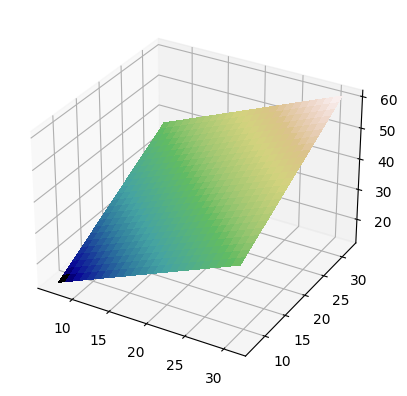

In [29]:
from matplotlib import cm
from matplotlib.colors import LightSource
import matplotlib.pyplot as plt
import numpy as np

# Load and format data
z = np.array(li_steps)
nrows, ncols = len(li_steps), len(li_steps[0])
x = np.linspace(2, 31, ncols)
y = np.linspace(2, 32, nrows)
x, y = np.meshgrid(x, y)

region = np.s_[5:50, 5:50]
x, y, z = x[region], y[region], z[region]

# Set up plot
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))

ls = LightSource(270, 45)
# To use a custom hillshading mode, override the built-in shading and pass
# in the rgb colors of the shaded surface calculated from "shade".
rgb = ls.shade(z, cmap=cm.gist_earth, vert_exag=0.1, blend_mode='soft')
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=rgb,
                       linewidth=0, antialiased=False, shade=False)

plt.show()

## LO

In [31]:
lo_steps = []
strategy = LOStrategy()
for nm_pairs_list in tqdm(nm_pairs):
    lo_steps_list = []
    for n, m in nm_pairs_list:
        term = omega_multi_i_term(n, m)
        _, norm_steps = term.normalize(strategy, is_limited=False)
        lo_steps_list.append(norm_steps)
    lo_steps.append(lo_steps_list)

100%|██████████| 30/30 [27:44<00:00, 55.50s/it] 


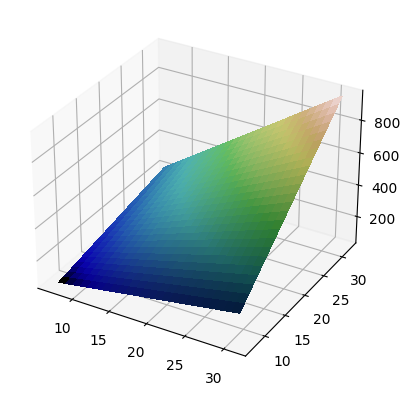

In [32]:
from matplotlib import cm
from matplotlib.colors import LightSource
import matplotlib.pyplot as plt
import numpy as np

# Load and format data
z = np.array(lo_steps)
nrows, ncols = len(li_steps), len(li_steps[0])
x = np.linspace(2, 31, ncols)
y = np.linspace(2, 32, nrows)
x, y = np.meshgrid(x, y)

region = np.s_[5:50, 5:50]
x, y, z = x[region], y[region], z[region]

# Set up plot
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))

ls = LightSource(270, 45)
# To use a custom hillshading mode, override the built-in shading and pass
# in the rgb colors of the shaded surface calculated from "shade".
rgb = ls.shade(z, cmap=cm.gist_earth, vert_exag=0.1, blend_mode='soft')
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=rgb,
                       linewidth=0, antialiased=False, shade=False)

plt.show()

# Testing drawings

<class 'numpy.ndarray'>
[[483 487 491 ... 446 431 444]
 [475 486 489 ... 432 440 457]
 [479 485 488 ... 437 463 468]
 ...
 [597 592 582 ... 259 268 274]
 [570 567 551 ... 265 271 274]
 [545 543 532 ... 268 270 272]]


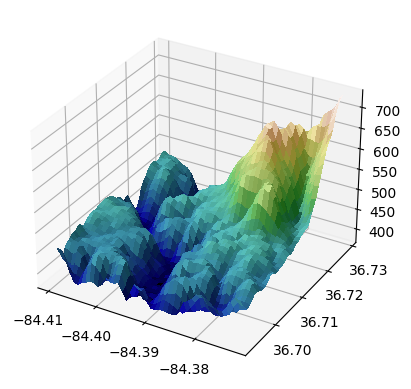

In [26]:
from matplotlib import cbook
from matplotlib import cm
from matplotlib.colors import LightSource
import matplotlib.pyplot as plt
import numpy as np

# Load and format data
dem = cbook.get_sample_data('jacksboro_fault_dem.npz', np_load=True)
z = dem['elevation']
print(type(z))
print(z)
nrows, ncols = z.shape
x = np.linspace(dem['xmin'], dem['xmax'], ncols)
y = np.linspace(dem['ymin'], dem['ymax'], nrows)
x, y = np.meshgrid(x, y)

region = np.s_[5:50, 5:50]
x, y, z = x[region], y[region], z[region]

# Set up plot
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))

ls = LightSource(270, 45)
# To use a custom hillshading mode, override the built-in shading and pass
# in the rgb colors of the shaded surface calculated from "shade".
rgb = ls.shade(z, cmap=cm.gist_earth, vert_exag=0.1, blend_mode='soft')
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=rgb,
                       linewidth=0, antialiased=False, shade=False)

plt.show()

C:\Users\voldo\AppData\Local\Temp\ipykernel_11020\3489294008.py:11: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data = np.ones(axes, dtype=np.bool)


{(0, 0, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1750e06fe50>,
 (0, 0, 4): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1750cfd9e90>,
 (0, 1, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1750e5c5550>,
 (0, 1, 4): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1750e5c6490>,
 (0, 2, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1750e5c74d0>,
 (0, 2, 4): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1750e5dc610>,
 (0, 3, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1750e5dd390>,
 (0, 3, 4): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1750e5de290>,
 (0, 4, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1750e5df150>,
 (0, 4, 4): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1750e5dff50>,
 (1, 0, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1750e5e5010>,
 (1, 0, 4): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1750e5e5fd0>,
 (1, 1, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1750e5e6f50>,
 (1, 1, 4): 

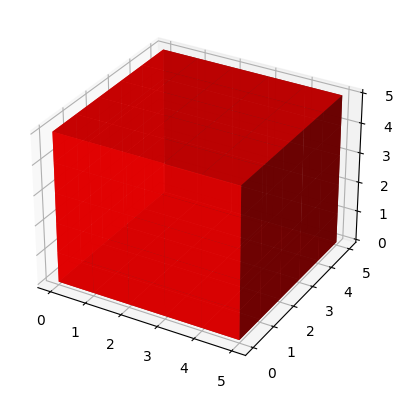

In [9]:
# Import libraries
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


# Create axis
axes = [5, 5, 5]

# Create Data
data = np.ones(axes, dtype=np.bool)

# Control Transparency
alpha = 0.9

# Control colour
colors = np.empty(axes + [4], dtype=np.float32)

colors[:] = [1, 0, 0, alpha] # red

# Plot figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Voxels is used to customizations of the
# sizes, positions and colors.
ax.voxels(data, facecolors=colors)

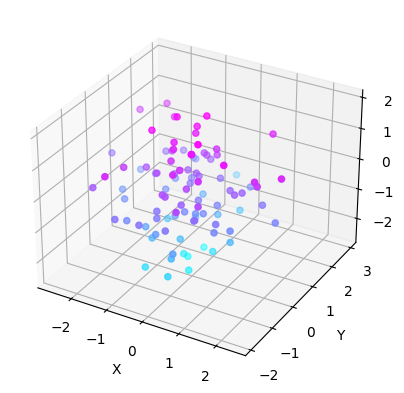

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np

# Generate some random data
x = np.random.normal(size=100)
y = np.random.normal(size=100)
z = np.random.normal(size=100)

# Create a 3D scatter plot
fig = plt.figure()
ax = plt.axes(projection='3d')
# ax.scatter(x, y, z, c=z, cmap='viridis')
# ax.scatter(x, y, z, c=z, cmap='plasma')
# ax.scatter(x, y, z, c=z, cmap='magma')
ax.scatter(x, y, z, c=z, cmap='cool')
# ax.scatter(x, y, z, c=z, cmap='hot')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()